In [1]:
import pandas as pd
import numpy as np
import math

UNCLASSIFIED = False
NOISE = -1

In [2]:
def _dist(p,q):
    # compute and return the euclidean distance
    # put your code here
    distance = 0
    for i in range(min(len(p),len(q))):
        distance = distance + (p[i]-q[i])**2
    return distance**0.5

In [3]:
def _eps_neighborhood(p,q,eps):
    # check if the distance between p and q is below eps
    # return True or False
    # put your code here
    if _dist(p,q) <= eps:
        return True
    else:
        return False

In [4]:
def _region_query(m, point_id, eps):
    n_points = m.shape[1]
    seeds = []
    # find and return all points that belong to eps-neighborhood of point_id
    # put your code here
    for i in range(n_points):
        if _eps_neighborhood([m[0,point_id],m[1,point_id]],[m[0,i],m[1,i]],eps):
            seeds.append(i)
    return seeds

In [5]:
def _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
    # expand the cluster of cluster_id from point_id
    # identify all points belonging to cluster_id
    # update the clustering results in "classification" by assigning cluster_id to each point
    # return True if point_id is a core, False if point_id is not a core
    # write your code below
    if len(_region_query(m,point_id,eps))-1 >= min_points:
        classifications[point_id] = cluster_id
        seeds = _region_query(m, point_id, eps)
        for i in seeds:
            result_point_seed =_region_query(m,i,eps)
            if len(result_point_seed) >= min_points:
                for i in range(len(result_point_seed)):
                    endpoint = result_point_seed[i]
                    if classifications[endpoint] == UNCLASSIFIED:
                        seeds.append(endpoint)
                        classifications[endpoint] = cluster_id
                    elif classifications[endpoint] == NOISE:
                        classifications[endpoint] = cluster_id
        return True
    else:
        classifications[point_id] = NOISE
        return False        

In [6]:
def dbscan(m, eps, min_points):
    """Implementation of DBSCAN
    You can refer to wikipedia for detailed algorithm: https://en.wikipedia.org/wiki/DBSCAN
    Use Euclidean Distance as the measure
    
    Inputs:
    m - A matrix whose columns are feature vectors
    eps - Maximum distance two points can be to be regionally related
    min_points - The minimum number of points to make a cluster
    
    Outputs:
    An array with either a cluster id number or dbscan.NOISE (None) for each column vector in m
    """
    cluster_id = 1
    n_points = m.shape[1]
    classifications = [UNCLASSIFIED] * n_points
    # the main dbscan algorithm
    # put your code here
    for i in range(n_points):
        if classifications[i]==UNCLASSIFIED:
            if _expand_cluster(m, classifications, i, cluster_id, eps, min_points):
                cluster_id += 1
    return classifications

In [7]:
# test here
dataset_1 = pd.read_csv('blobs.csv')[:80].values
m = np.asmatrix(dataset_1)
m = m.transpose()

In [8]:
eps = 1.6
min_points = 5
a = dbscan(m, eps, min_points)

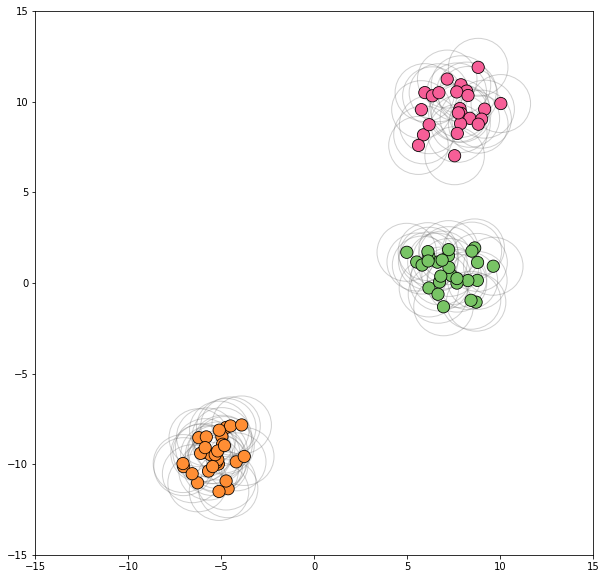

In [9]:
%matplotlib inline


import dbscan_lab_helper as helper

result = np.asarray(a)
helper.plot_clustered_dataset(dataset_1, result, neighborhood=True, epsilon=eps)

In [10]:
dataset_2 = pd.read_csv('varied.csv')[:300].values
m = np.asmatrix(dataset_2)
m = m.transpose()

In [11]:
eps = 1.3
min_points = 5
a = dbscan(m, eps, min_points)

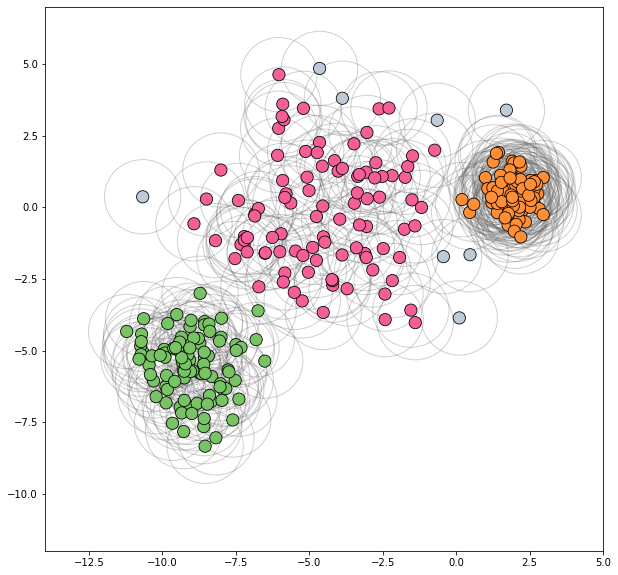

In [12]:
result = np.asarray(a)
helper.plot_clustered_dataset(dataset_2, result, xlim=(-14, 5), ylim=(-12, 7), neighborhood=True, epsilon=eps)
